# AUTHOR
***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from scipy.spatial.distance import cdist
from skimage import io
from PIL import Image
import requests
from urllib.request import urlopen

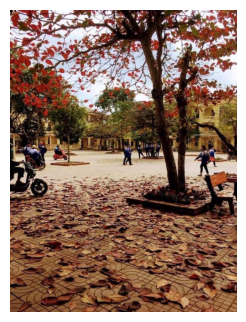

(960, 720, 3)


In [2]:
# load image and feature it

f = 'https://i.pinimg.com/originals/d1/fc/1c/d1fc1cab239cbe6fa05f1b2b2ef917e7.jpg'

img = io.imread(f)

# img = mimg.imread(im)
plt.figure(dpi=100)

plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

In [3]:
'''
  define a class to write Kmeans source code
'''
class HST_KMeans:

  '''
    constructor:
      @param n_clusters: The number of clusters that you want to divide your data points into
      @param iters_per_loss: Check value of loss funtion after every iters_per_loss iterations
          default value is 1
      @param show_progress: Display loss, it depend on iters_per_loss
  '''
  def __init__(self, n_clusters=0, iters_per_loss=1, show_progress=False):
    if n_clusters <= 0 or not isinstance(n_clusters, int):
      raise ValueError('number of clusters must be a positive integer!')
    self.reset_state()
    self.n_clusters = n_clusters
    self.__max_iter_ = 100000
    self.show_progress_ = show_progress
    self.iters_per_loss = iters_per_loss
  
  def __init_centers(self, X, k):
    return X[np.random.choice(X.shape[0], k, replace = False)]

  def __assign_labels(self, X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

  def __update_centers(self, X, labels, K):
    centers = np.zeros((K, X.shape[1]))

    for k in range(K):
      Xk = X[labels == k, :]
      if Xk.shape[0] > 0:
        centers[k, :] = np.mean(Xk, axis = 0)

    return centers
  
  def __loss(self, X):
    loss = 0
    for k in range(self.n_clusters):
      lk = np.where(self.labels_ == k)[0]
      tx = cdist(X[lk, :], [self.centers_[k]])
      loss += np.sum(tx * tx)
    return loss

  def __has_converged(self, centers, new_centers):
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))
    
  def reset_state(self):
    self.centers_ = None
    self.n_iter_ = None
    self.labels_ = None
    self.loss_ = list()
    
  def fit(self, X):
    if self.n_clusters <= 0 or not isinstance(self.n_clusters, int):
      raise ValueError('number of clusters must be a positive integer!')
    centers = self.__init_centers(X, self.n_clusters)
    self.n_iter_ = 0

    while self.n_iter_ <= self.__max_iter_:
      labels = self.__assign_labels(X, centers)
      new_centers = self.__update_centers(X, labels, self.n_clusters)
      self.labels_ = labels
      self.centers_ = new_centers
      if self.n_iter_ % self.iters_per_loss == 0:
        loss = self.__loss(X)
        self.loss_.append(loss)
        if self.show_progress_:
          print('- {iter:5d} iterations,\tloss: {loss:-15.10f}, \tcenters updated'.format(iter = self.n_iter_, loss = loss))

      self.n_iter_ += 1
      
      if self.__has_converged(centers, new_centers):
        break
      centers = new_centers
      
    else:
      print("No solution!")

    return self

  def predict(self, X):
    if self.n_clusters <= 0 or not isinstance(self.n_clusters, int):
      raise ValueError('number of clusters must be a positive integer!')
    D = cdist(X, self.centers_)
    return np.argmin(D, axis = 1)



# Test model

In [4]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
print(X.shape)

kmn = HST_KMeans(n_clusters=3, show_progress=True).fit(X)

(691200, 3)
-     0 iterations,	loss: 1899760077.5309410095, 	centers updated
-     1 iterations,	loss: 1676346533.2700929642, 	centers updated
-     2 iterations,	loss: 1575538927.9336123466, 	centers updated
-     3 iterations,	loss: 1527290326.5924930573, 	centers updated
-     4 iterations,	loss: 1504210120.6455385685, 	centers updated
-     5 iterations,	loss: 1492902578.0560331345, 	centers updated
-     6 iterations,	loss: 1487510242.1532640457, 	centers updated
-     7 iterations,	loss: 1484779704.1792640686, 	centers updated
-     8 iterations,	loss: 1483443495.8208794594, 	centers updated
-     9 iterations,	loss: 1482772688.6440849304, 	centers updated
-    10 iterations,	loss: 1482453132.6639442444, 	centers updated
-    11 iterations,	loss: 1482292538.9440979958, 	centers updated
-    12 iterations,	loss: 1482207848.6399714947, 	centers updated
-    13 iterations,	loss: 1482164192.1274619102, 	centers updated
-    14 iterations,	loss: 1482143160.0249121189, 	centers update

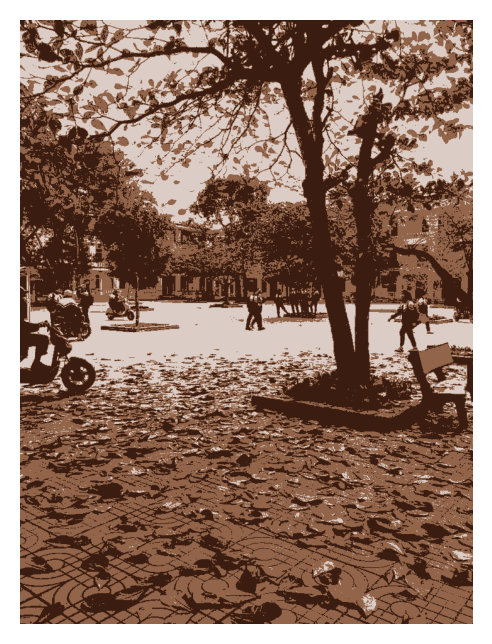

In [5]:
plt.figure(dpi=200)

labels_ans = kmn.predict(X)
centers_ans = kmn.centers_
img_ans = np.zeros_like(X)

for i in range(len(X)):
  img_ans[i] = centers_ans[labels_ans[i]]

img_ans = img_ans.reshape((img.shape[0], img.shape[1], img.shape[2]))

plt.imshow(img_ans)
plt.axis('off')

plt.show()

# EVALUATE

## Evaluate the loss function with the number of iterations

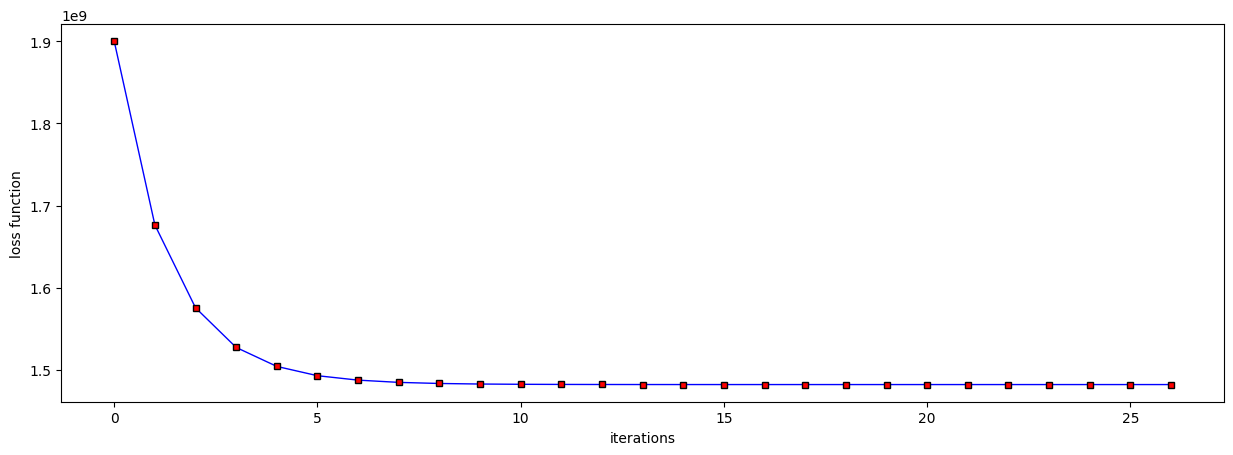

In [6]:
def remark(loss, dpi=100):
  plt.figure(dpi=dpi, figsize=(15, 5))
  x0 = list(range(len(loss)))
  plt.plot(x0, loss, 'b', linewidth=1)
  plt.plot(x0, loss, 'rs', markeredgecolor='k', markersize=4)

  plt.ylabel("loss function")
  plt.xlabel("iterations")

  plt.show()

remark(kmn.loss_)

## Evaluate the optimal loss function with the number of clusters (Elbow method)

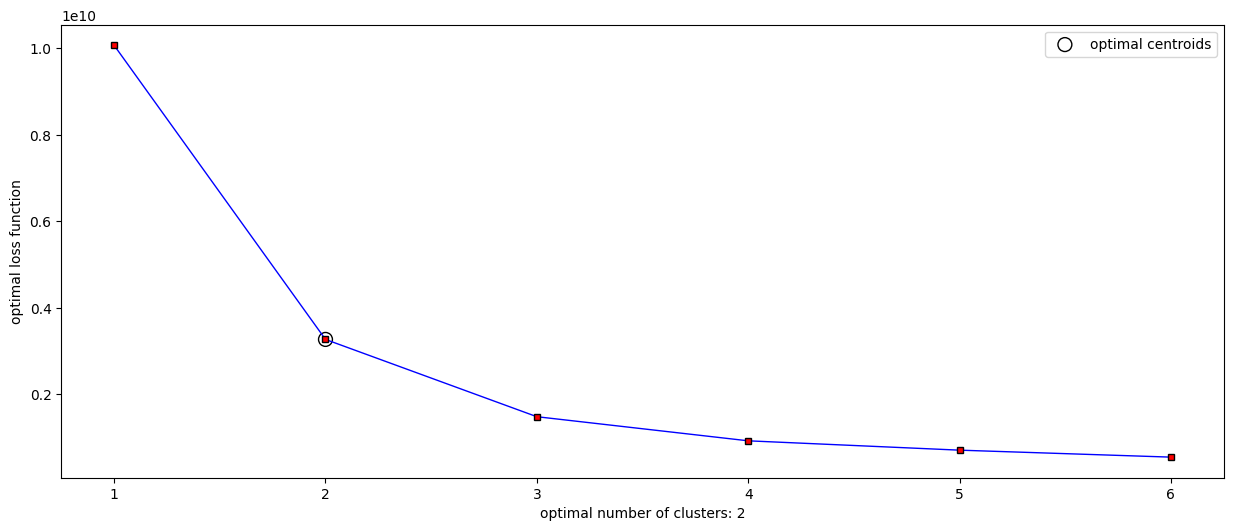

In [32]:
# Use the dataset above (X)


def find_optimal_clusters(bound):
  clusters = list(range(1, bound + 1))

  loss_c = []

  for cluster in clusters:
    test_kmn = HST_KMeans(cluster)

    test_kmn.fit(X)
    loss_c.append(test_kmn.loss_[-1])

  optimal_cluster = 0
  cos_ = -1

  for i in range(1, bound - 1):
    vec1 = np.array([-1, (loss_c[i - 1] - loss_c[i]) / loss_c[0]])
    vec2 = np.array([1, (loss_c[i + 1] - loss_c[i]) / loss_c[0]])
    cos_vec = (vec1 @ vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    if cos_vec > cos_:
      cos_ = cos_vec
      optimal_cluster = i

  plt.figure(dpi=100, figsize=(15, 6))

  plt.plot(clusters, loss_c, 'b', linewidth=1)
  plt.plot(clusters, loss_c, 'rs', markeredgecolor='k', markersize=4)
  plt.scatter(clusters[optimal_cluster], loss_c[optimal_cluster], s=100, facecolor='None', edgecolors='k', label = 'optimal centroids')

  plt.ylabel("optimal loss function")
  plt.xlabel(f"optimal number of clusters: {clusters[optimal_cluster]}")

  plt.legend()
  plt.show()

find_optimal_clusters(6)


## Silhouette Analysis
Silhouette analysis can be used to determine the degree of separation between clusters. Specifically:

- Compute the average distance from all data points in the same cluster $(a_i)$.
- Compute the average distance from all data points in the closest cluster $(b_i)$.
- Compute the coefficient:
$\frac{b_i-a_i}{\max(b_i,a_i)}$

The coefficient can take values in the interval [-1, 1].

- If it is 0 –> the sample is very close to the neighboring clusters.
- It it is 1 –> the sample is far away from the neighboring clusters.
- It it is -1 –> the sample is assigned to the wrong clusters.

Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters. We’ll use here geyser dataset again because its cheaper to run the silhouette analysis and it is actually obvious that there is most likely only two groups of data points.

In [33]:
# I will finish it later, after I finish the midterm exam